In [22]:
import torch
import torchvision
from torchvision import transforms as T
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
from torchvision.utils import draw_bounding_boxes
import numpy as np

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model.eval()

In [4]:
ig = Image.open('/content/horses.jpg')
transform = T.ToTensor()
img = transform(ig)

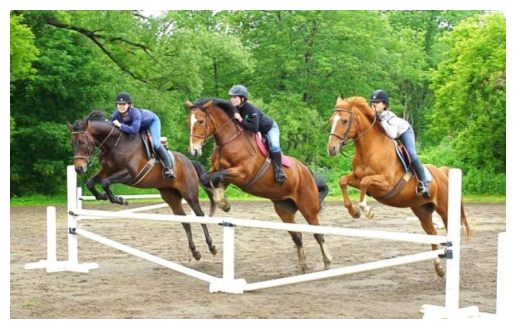

In [20]:
plt.imshow(ig)
_ = plt.axis('off')


In [5]:
with torch.no_grad():
  pred = model([img])
pred

[{'boxes': tensor([[272.1582, 142.9736, 498.6890, 410.4344],
          [330.2632, 114.8104, 435.7061, 261.5899],
          [ 87.6827, 158.6821, 315.0036, 359.8193],
          [552.8798, 123.3619, 647.9176, 277.4510],
          [487.0976, 138.3963, 703.2509, 398.0327],
          [151.0076, 128.9682, 251.3945, 256.3805],
          [137.7137, 144.9362, 426.5666, 420.0364],
          [525.1882, 118.4798, 681.5156, 320.0544],
          [357.2725, 137.7474, 658.0818, 440.8024],
          [529.7208, 298.2513, 561.4907, 324.7542],
          [486.4420, 136.4635, 629.2859, 317.0760],
          [ 87.6193, 164.1796, 230.5364, 300.4576],
          [626.8946, 449.9609, 733.7133, 474.6573],
          [270.8938, 137.3561, 418.4493, 285.6298],
          [693.6395, 295.3015, 707.3336, 344.8665]]),
  'labels': tensor([19,  1, 19,  1, 19,  1, 19,  1, 19, 40, 19, 19, 62, 19, 19]),
  'scores': tensor([0.9989, 0.9989, 0.9980, 0.9971, 0.9971, 0.9969, 0.3102, 0.2086, 0.1730,
          0.1624, 0.1474, 0.1435, 0

In [7]:
obj = {19: 'horse', 1:'person'}
boxes, labels, scores = pred[0]['boxes'], pred[0]['labels'].numpy(), pred[0]['scores'].numpy()
label_idx = np.argwhere(scores > 0.9)


In [8]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import numpy as np

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

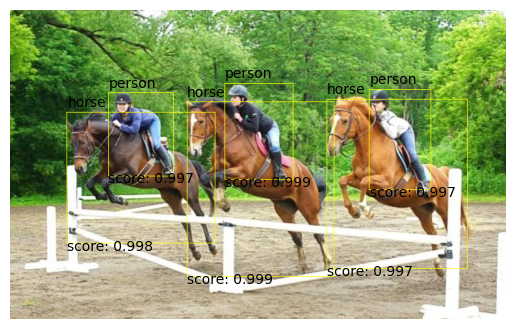

In [9]:
from torchvision.utils import draw_bounding_boxes

imgg = img * 255
drawn_boxes = draw_bounding_boxes(imgg.to(torch.uint8), boxes[:6], colors="yellow")
image = drawn_boxes.detach()
image = F.to_pil_image(image)
plt.imshow(np.asarray(image))
for ind in label_idx:
  i = ind[0]
  plt.text(boxes[i][0], boxes[i][1]-10, obj[labels[i]])
  score = 'score: '+  '{0:.3f}'.format(scores[i])
  plt.text(boxes[i][0], boxes[i][3]+10, score)
_ = plt.axis('off')


In [11]:
ig_1 = ig.crop((87, 128, 272, 330))
ig_2 = ig.crop((272, 114, 490, 380))
ig_3 = ig.crop((487, 123, 703, 360))


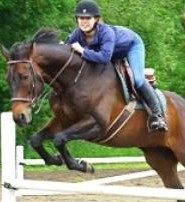

In [12]:
ig_1

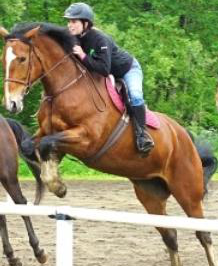

In [13]:
ig_2

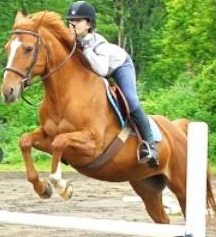

In [14]:
ig_3

In [15]:
#first model
segmentation_model1 = torchvision.models.segmentation.fcn_resnet50(pretrained=True)
segmentation_model1 = segmentation_model1.eval()
#second model
segmentation_model2 = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=True)
segmentation_model2 = segmentation_model2.eval()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
input_images = [ig_1,ig_2,ig_3]
models = [segmentation_model1, segmentation_model2]


# preprocessing steps for input images
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


# color palette for segmentation
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")



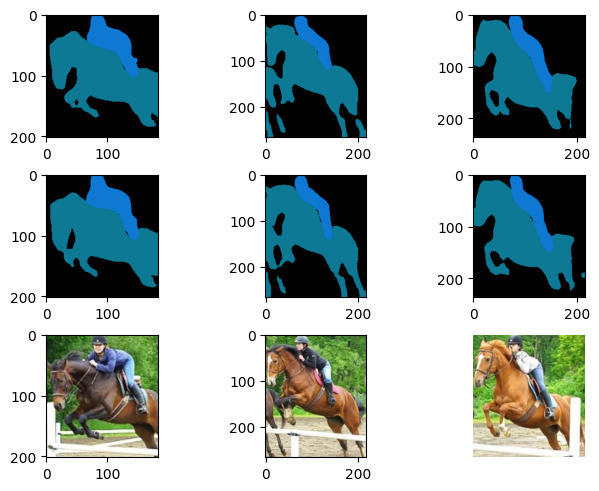

In [21]:
fig, axs = plt.subplots(3, 3, layout='constrained')

times1 = []
times2 = []

for i, input_image in enumerate(input_images):
  axs[2,i].imshow(input_image)
  for m, model in enumerate(models):
    input_image = input_image.convert("RGB")
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
    with torch.no_grad():
      output = models[m](input_batch)['out'][0]
    output_predictions = output.argmax(0)

    # plot the semantic segmentation predictions of 21 classes in each color
    r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
    r.putpalette(colors)
    axs[m,i].imshow(r)

